# day 189,day 191,day 193

In [1]:
import numpy as np
import torch
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_circles
import pandas as pd
from sklearn.model_selection import train_test_split

In [2]:
x,y = make_circles(n_samples=1000,
                   noise=0.03,
                   random_state=42)

print(x) #we have two features in x so it is going to be a binary classification

[[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 ...
 [-0.13690036 -0.81001183]
 [ 0.67036156 -0.76750154]
 [ 0.28105665  0.96382443]]


In [3]:
# lets create a DataFrame

circles_dataframe = pd.DataFrame({'x1':x[:,0],'x2':x[:,1],'y':y})

circles_dataframe

,x1,x2,y
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


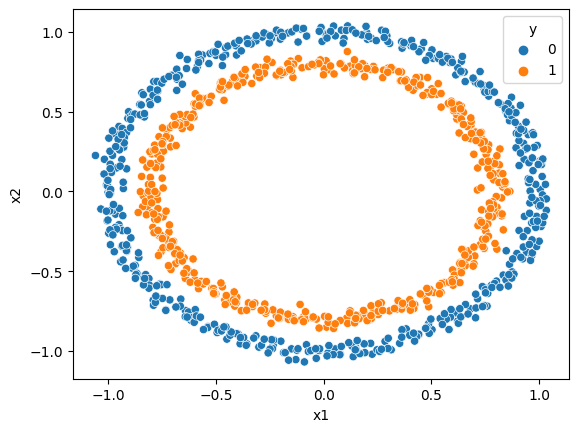

In [4]:
# visualization

sns.scatterplot(data=circles_dataframe,x='x1',y='x2',hue='y');

In [5]:
# converting x and y into tensors and dtype float32

def tensor_conversion(x):
  return torch.tensor(x,dtype=torch.float32)

x,y = map(tensor_conversion,(x,y))

# x and y are iterables that's why map works. it doesn't work on non-iterables.

In [ ]:
# train_test splitting

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

x_train.shape,x_test.shape

(torch.Size([800, 2]), torch.Size([200, 2]))

In [ ]:
# make the data be device agnostic
def device_agnosticm(x):
  device = 'cuda' if torch.cuda.is_available() else 'cpu'
  return x.to(device)


x_train,x_test,y_train,y_test = map(device_agnosticm,(x_train,x_test,y_train,y_test))

In [ ]:
# creating a model

'''we create models in this subclassing fashion because it gives us more control'''

class classification_model_v0(torch.nn.Module):

  def __init__(self):
    super().__init__()
    '''in the first layer input_feautures are set(in our case it is 2) and in the last layer the output features
    are set(in our case it is 1) in the first layer out_features represent hidden layer which connects the in_features
    in layer2 this is to say connection between neural networks are made'''

    self.layer1 = torch.nn.Linear(in_features=2,out_features=5)
    self.layer2 = torch.nn.Linear(in_features=5,out_features=1)

  '''this is where the real magic is x >> self.layer1 >> self.layer2'''
  def forward(self,x):
    return self.layer2(self.layer1(x))



In [ ]:
# instantiating the model
device = 'cuda' if torch.cuda.is_available() else 'cpu'
model0 = classification_model_v0().to(device)

In [ ]:
# setting the compiler with loss function,optimizer and metrics
loss = torch.nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(params=model0.parameters(),
                            lr=0.01)
def accuracy(prediction,actual):
  correct = torch.eq(prediction,actual).sum().item()
  acc = correct/len(actual) * 100

  return acc



In [ ]:
# fitting the model:

# setting the random seeds:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# setting the number of epochs
epochs = 100

# initializing empty containers to hold apt values.
epoch_container = []
train_loss_container = []
test_loss_container = []
train_accuracy_container = []
test_accuracy_container = []

for i in range(epochs):
  # training
  model0.train()

  # getting the training loss and training accuracy
  train_logits = model0(x_train).squeeze()
  train_prediction = torch.round(torch.sigmoid(train_logits)) # activation layer
  train_actual = y_train
  train_loss = loss(train_logits,train_actual)
  train_accuracy = accuracy(train_prediction,train_actual)



  # setting the optimizer to have zero grad
  optimizer.zero_grad()

  # backpropogate the train loss
  train_loss.backward()

  # step the optimizer up a notch
  optimizer.step()

  # testing
  model0.eval()

  # getting the test_Loss and test accuracy
  with torch.inference_mode():
    test_logits = model0(x_test).squeeze()
    test_prediction = torch.round(torch.sigmoid(test_logits))
    test_actual = y_test
    test_loss = loss(test_prediction,test_actual)
    test_accuracy = accuracy(test_prediction,test_actual)


    # putting things in the empty containers
    epoch_container.append(i)
    train_loss_container.append(train_loss)
    test_loss_container.append(test_loss)
    train_accuracy_container.append(train_accuracy)
    test_accuracy_container.append(test_accuracy)


    # print the results:
    if i%10 == 0:
      print('Epoch: {} | Train_Loss: {:.4f}| Train_Acc:{:.4f}| Test_Loss: {:.4f}| Test_Acc {:.4f}'.format(i,
                                                                                        train_loss,
                                                                                        train_accuracy,
                                                                                        test_loss,
                                                                                        test_accuracy))









Epoch: 0 | Train_Loss: 0.7798| Train_Acc:50.0000| Test_Loss: 0.8133| Test_Acc 50.0000
Epoch: 10 | Train_Loss: 0.7714| Train_Acc:50.0000| Test_Loss: 0.8133| Test_Acc 50.0000
Epoch: 20 | Train_Loss: 0.7639| Train_Acc:50.0000| Test_Loss: 0.8133| Test_Acc 50.0000
Epoch: 30 | Train_Loss: 0.7571| Train_Acc:50.0000| Test_Loss: 0.8133| Test_Acc 50.0000
Epoch: 40 | Train_Loss: 0.7511| Train_Acc:50.0000| Test_Loss: 0.8133| Test_Acc 50.0000
Epoch: 50 | Train_Loss: 0.7456| Train_Acc:50.0000| Test_Loss: 0.8133| Test_Acc 50.0000
Epoch: 60 | Train_Loss: 0.7407| Train_Acc:50.0000| Test_Loss: 0.8133| Test_Acc 50.0000
Epoch: 70 | Train_Loss: 0.7362| Train_Acc:50.0000| Test_Loss: 0.8133| Test_Acc 50.0000
Epoch: 80 | Train_Loss: 0.7322| Train_Acc:50.0000| Test_Loss: 0.8133| Test_Acc 50.0000
Epoch: 90 | Train_Loss: 0.7286| Train_Acc:50.0000| Test_Loss: 0.8133| Test_Acc 50.0000


# exploration,analysis and freethrows:

# exploring logit function


# definition:
* logits are any unnormalized output of a neural network.
* we normalize the logits using activation functions such as softmax or sigmoid or tanh and so on.

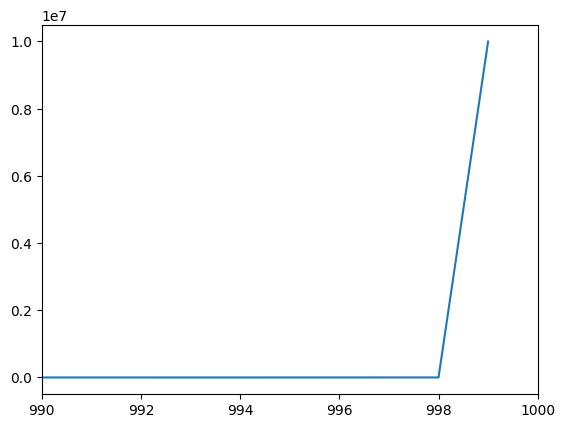

In [ ]:
# without natural log
p = np.linspace(0.0001,0.9999999,1000)

logit = (p/(1-p))

plt.plot(logit)

plt.xlim([990,1000]);

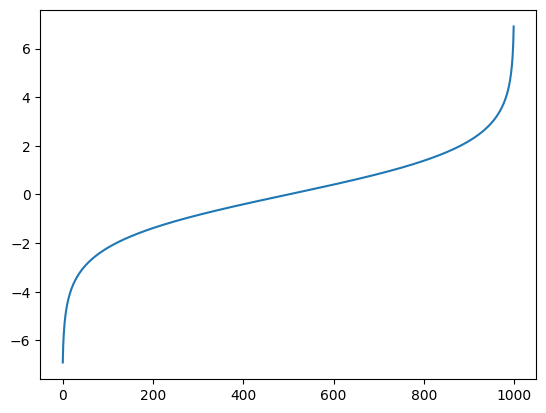

In [ ]:
# with log
p = np.linspace(0.001,0.999,1000)

logit = np.log(p/(1-p))

plt.plot(logit);

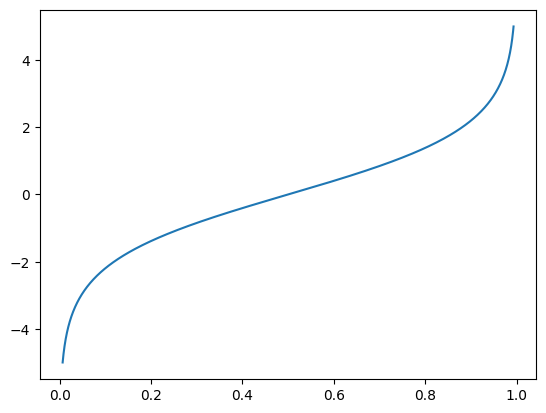

In [ ]:
# visualize a sigmoid function
x = np.linspace(-5,5,1000)
sigmoid = 1/(1+np.exp(-x))

plt.plot(sigmoid,x);

# importing somebody else's creation from GitHub.

In [ ]:
import requests
from pathlib import Path

# if helper_function.py file already exists print 'it already exists'
if Path('helper_functions.py').is_file():
  print('Already downloaded. File Exists')

else:
  print('Downloading Helper Functions')
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open('helper_functions.py','wb') as f:
    f.write(request.content)

from helper_functions import plot_predictions, plot_decision_boundary


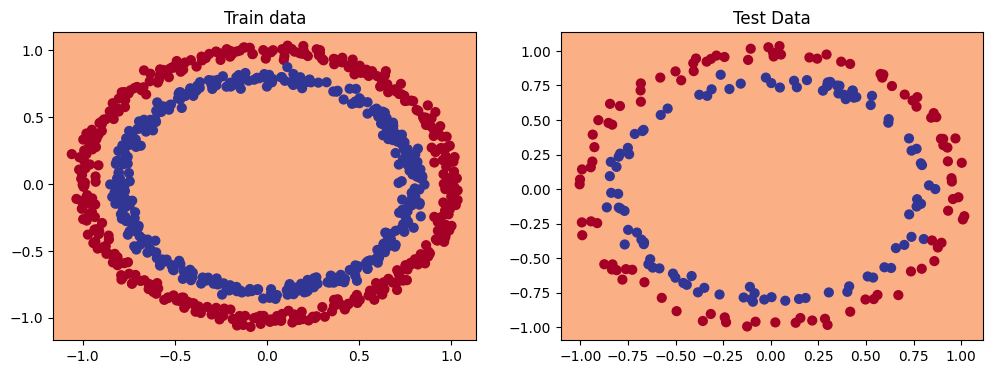

In [ ]:
# visualizig our model's performance:

plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.title('Train data')
plot_decision_boundary(model0,x_train,y_train)

plt.subplot(1,2,2)
plt.title('Test Data')
plot_decision_boundary(model0,x_test,y_test)

# day 193

# how to improve the model:

1. we can increase more neurons in the hidden layer to get the model find more nuanced patterns in the data.
2. increase the # of epochs to make the revise and train with the training dataset more number of times.
3. normalize the inputs - make the values range between a certain threshold to improve accuracy/predictability.
4. add activation layers such as Relu or tanh to make the linear line curvilinear to bend and turn in places of most requirment to predict well.
5. change the optimizer to increased performance or accuracy.
6. adjust aptly the learning rate of the opitimizer to get to the ideal point with few steps.


In [ ]:
# creating a new model
# changes:
'''1. Add more neuron in hidden layer from 2 -> 3
   2. Add more hidden neurons from 5  -> 10
   3. Add more epochs to train '''

# creating the model instantiator:
class classification_model_v1(torch.nn.Module):
  def __init__(self):
    super().__init__()

    # creating the neural network
    self.layer1 = torch.nn.Linear(in_features=2,out_features=10)
    self.layer2 = torch.nn.Linear(in_features=10,out_features=10)
    self.layer3 = torch.nn.Linear(in_features=10,out_features=1)



  def forward(self,x):
    return self.layer3(self.layer2(self.layer1(x)))


model1 = classification_model_v1().to(device)

# compiling the model
loss = torch.nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(params=model1.parameters(),lr=0.001)
def accuracy(prediction,actual):
  correct = torch.eq(prediction,actual).sum().item()
  acc = correct/len(prediction) * 100

  return acc

# fitting the model
torch.manual_seed(42)
torch.cuda.manual_seed(42)

epochs = 300

epoch_container = []
train_loss_container = []
train_accuracy_container = []
test_loss_container = []
test_accuracy_container = []

for epoch in range(epochs):

  # training the model
  model1.train()

  # getting training loss and training accuracy
  train_logit = model1(x_train).squeeze()
  train_prediction = torch.round(torch.sigmoid(train_logit))
  train_actual = y_train
  train_loss = loss(train_logit,train_actual)
  train_accuracy = accuracy(train_prediction,train_actual)

  # setting the optimizer to zero grad
  optimizer.zero_grad()

  # back propogate
  train_loss.backward()

  # step the optimizer up a notch.
  optimizer.step()

  # testing
  model1.eval()

  # getting testing_loss and testing_accuracy
  with torch.inference_mode():
    test_logit = model1(x_test).squeeze()
    test_prediction = torch.round(torch.sigmoid(test_logit))
    test_actual = y_test
    test_loss = loss(test_logit,test_actual)
    test_accuracy = accuracy(test_prediction,test_actual)

    # filling in the containers similar to history in tensorflow
    epoch_container.append(epoch)
    test_loss_container.append(test_loss)
    test_accuracy_container.append(test_accuracy)
    train_loss_container.append(train_loss)
    train_accuracy_container.append(train_accuracy)


    # printing out the results
    if epoch%30 == 0:
      print('Epoch:{} | Train Loss: {:.4f} | Train Accuracy: {:.4f} | Test Loss: {:.4f} | Test Accuracy: {:.4f}'\
            .format(epoch,train_loss,train_accuracy,test_loss,test_accuracy))







Epoch:0 | Train Loss: 0.6940 | Train Accuracy: 50.8750 | Test Loss: 0.6926 | Test Accuracy: 51.0000
Epoch:30 | Train Loss: 0.6939 | Train Accuracy: 50.7500 | Test Loss: 0.6926 | Test Accuracy: 51.0000
Epoch:60 | Train Loss: 0.6939 | Train Accuracy: 50.7500 | Test Loss: 0.6926 | Test Accuracy: 51.0000
Epoch:90 | Train Loss: 0.6939 | Train Accuracy: 50.6250 | Test Loss: 0.6926 | Test Accuracy: 51.0000
Epoch:120 | Train Loss: 0.6939 | Train Accuracy: 50.6250 | Test Loss: 0.6926 | Test Accuracy: 51.0000
Epoch:150 | Train Loss: 0.6939 | Train Accuracy: 50.6250 | Test Loss: 0.6926 | Test Accuracy: 50.5000
Epoch:180 | Train Loss: 0.6939 | Train Accuracy: 50.6250 | Test Loss: 0.6926 | Test Accuracy: 50.5000
Epoch:210 | Train Loss: 0.6939 | Train Accuracy: 50.6250 | Test Loss: 0.6926 | Test Accuracy: 50.5000
Epoch:240 | Train Loss: 0.6939 | Train Accuracy: 50.6250 | Test Loss: 0.6926 | Test Accuracy: 50.5000
Epoch:270 | Train Loss: 0.6939 | Train Accuracy: 50.7500 | Test Loss: 0.6926 | Test Acc

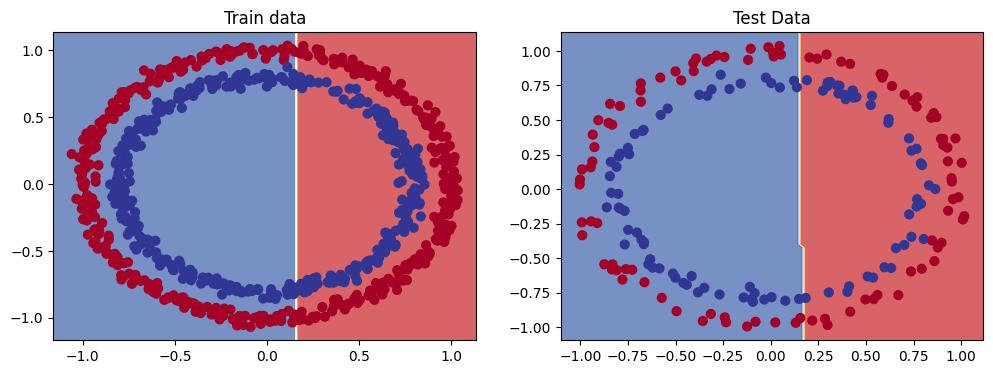

In [ ]:
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.title('Train data')
plot_decision_boundary(model1,x_train,y_train)

plt.subplot(1,2,2)
plt.title('Test Data')
plot_decision_boundary(model1,x_test,y_test)

# day 195 and day 197

In [ ]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import torch
import requests
from pathlib import Path
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_circles

In [ ]:
# importing x and y from make_circles
x,y = make_circles(n_samples=1000,
                   noise=0.03,
                   random_state=42)

# converting x and y to torch tensors
x,y = torch.tensor(x,dtype=torch.float32), torch.tensor(y,dtype=torch.float32)

# device agnosticism:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

def device_agnostic(x):
  device = 'cuda' if torch.cuda.is_available() else 'cpu'
  return x.to(device)

# train test split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

# making the data device agnostic
x_train, x_test, y_train, y_test = map(device_agnostic,(x_train,x_test,y_train,y_test))

In [ ]:
# building the instantiator for the model
class ClassificationModelV2(torch.nn.Module):
  def __init__(self):
    super().__init__()
    self.layer1 = torch.nn.Linear(in_features=2,out_features=10)
    self.layer2 = torch.nn.Linear(in_features=10,out_features=10)
    self.layer3 = torch.nn.Linear(in_features=10,out_features=1)
    self.ReLU   = torch.nn.ReLU()

  # functional API model
  def forward(self,x):
    return self.layer3(self.ReLU(self.layer2(self.ReLU(self.layer1(x)))))


model2 = ClassificationModelV2().to(device)

# compiling the model
loss = torch.nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(params=model2.parameters(),
                            lr=0.01)

def accuracy(prediction,actual):
  correct = torch.eq(prediction,actual).sum().item()
  acc = correct/len(actual)

  return acc

# fitting the model
epochs = 500

epoch_container = []
train_loss_container = []
train_accuracy_container = []
test_loss_container = []
test_accuracy_container = []

torch.manual_seed(42)
torch.cuda.manual_seed(42)
for epoch in range(epochs):
  # training

  model2.train()

  # getting the train_loss and train_accuracy
  train_logit = model2(x_train).squeeze()
  train_prediction = torch.round(torch.sigmoid(train_logit))
  train_actual = y_train
  train_loss = loss(train_logit,train_actual)
  train_accuracy = accuracy(train_prediction,train_actual)

  # zero grad
  optimizer.zero_grad()

  # back propogate
  train_loss.backward()

  # step the optimizer up a notch
  optimizer.step()

  # testing
  model2.eval()

  with torch.inference_mode():

    # getting test_loss and test_accuracy
    test_logit = model2(x_test).squeeze()
    test_prediction = torch.round(torch.sigmoid(test_logit))
    test_actual = y_test
    test_loss = loss(test_prediction,test_actual)
    test_accuracy = accuracy(test_prediction,test_actual)

    # putting things in containers
    epoch_container.append(epoch)
    train_loss_container.append(train_loss)
    train_accuracy_container.append(train_accuracy)
    test_loss_container.append(test_loss)
    test_accuracy_container.append(test_accuracy)


    # printing things out
    if epoch%100 == 0:
      print('Epoch: {} | Train_loss: {:4f} , Train_accuracy: {:.4f} | Test_loss: {:4f} , Test_accuracy: {:4f}'\
            .format(epoch,train_loss,train_accuracy,test_loss,test_accuracy))


Epoch: 0 | Train_loss: 0.692946 , Train_accuracy: 0.5000 | Test_loss: 0.813262 , Test_accuracy: 0.500000
Epoch: 100 | Train_loss: 0.692480 , Train_accuracy: 0.5038 | Test_loss: 0.813262 , Test_accuracy: 0.500000
Epoch: 200 | Train_loss: 0.692248 , Train_accuracy: 0.5900 | Test_loss: 0.772451 , Test_accuracy: 0.560000
Epoch: 300 | Train_loss: 0.692094 , Train_accuracy: 0.7013 | Test_loss: 0.693428 , Test_accuracy: 0.670000
Epoch: 400 | Train_loss: 0.691949 , Train_accuracy: 0.6837 | Test_loss: 0.659210 , Test_accuracy: 0.700000


Already Downloaded


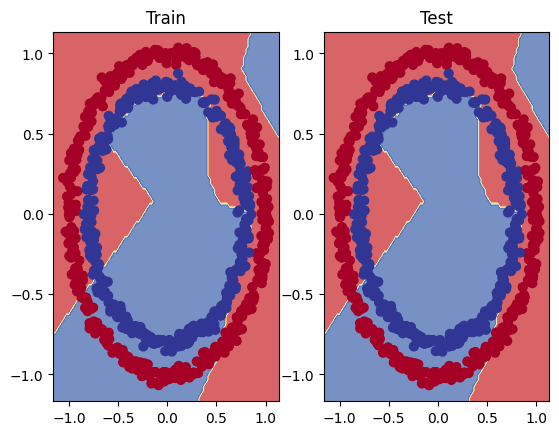

In [ ]:
# plotting the result

if Path('helper_functions.py').is_file():
  print('Already Downloaded')

else:
  print('Downloading Helper functions')
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py").content
  with open('helper_functions.py','wb') as f:
    f.write(request)

from helper_functions import plot_decision_boundary

plt.subplot(1,2,1)
plt.title('Train')
plot_decision_boundary(model2,x_train,y_train)

plt.subplot(1,2,2)
plt.title('Test')
plot_decision_boundary(model2,x_train,y_train)


In [ ]:
# creating model3 with:
# 5 hidden layers
# tanh activation function
# Adam optimizer
# 100 epochs

# building the instantiator
class ClassificationModelV3(torch.nn.Module):
  def __init__(self):
    super().__init__()

    self.layer1 = torch.nn.Linear(in_features=2,out_features=10)
    self.layer2 = torch.nn.Linear(in_features=10,out_features=10)
    self.layer3 = torch.nn.Linear(in_features=10,out_features=10)
    self.layer4 = torch.nn.Linear(in_features=10,out_features=10)
    self.layer5 = torch.nn.Linear(in_features=10,out_features=1)
    self.Tanh   = torch.nn.Tanh()


  def forward(self,x):
    return self.layer5(self.Tanh(self.layer4(self.Tanh(self.layer3(self.Tanh(self.layer2(self.Tanh(self.layer1(x)))))))))

# creating the model
model3 = ClassificationModelV3().to(device)


# compiling the model
loss = torch.nn.BCEWithLogitsLoss()
optimizer = torch.optim.Adam(params=model3.parameters(),
                             lr=0.01)

def accuracy(actual,prediction):
  correct = torch.eq(actual,prediction).sum().item()
  acc = correct/len(actual)
  return acc

# fitting the model

torch.manual_seed(42)
torch.cuda.manual_seed(42)

epochs = 100

epoch_container = []
train_loss_container = []
train_accuracy_container = []
test_loss_container = []
test_accuracy_container = []

for epoch in range(epochs):

  # training the model
  model3.train()

  # getting train_loss and train_accuracy
  train_logits = model3(x_train).squeeze()
  train_predictions = torch.round(torch.sigmoid(train_logits))
  train_actual = y_train
  train_loss = loss(train_logits,train_actual)
  train_accuracy = accuracy(train_actual,train_predictions)

  # setting the optimizer to zero grad on every epoch
  optimizer.zero_grad()

  # back propogatting the training losses
  train_loss.backward()

  # stepping the optimizer up a notch
  optimizer.step()

  # testing
  model3.eval()

  with torch.inference_mode():

    # getting test_loss and test_accuracy
    test_logits = model3(x_test).squeeze()
    test_predictions = torch.round(torch.sigmoid(test_logits))
    test_actual = y_test
    test_loss = loss(test_logits,test_actual)
    test_accuracy = accuracy(test_actual,test_actual)

    # filling in the containers
    epoch_container.append(epoch)
    train_loss_container.append(train_loss)
    train_accuracy_container.append(train_accuracy)
    test_loss_container.append(test_loss)
    test_accuracy_container.append(test_accuracy)


    # printing things out
    if epoch%10 == 0:
      print('Epoch: {} | Train_loss: {:4f} , Train_accuracy: {:.4f} | Test_loss: {:4f} , Test_accuracy: {:4f}'\
            .format(epoch,train_loss,train_accuracy,test_loss,test_accuracy))















Epoch: 0 | Train_loss: 0.698230 , Train_accuracy: 0.5000 | Test_loss: 0.694972 , Test_accuracy: 1.000000
Epoch: 10 | Train_loss: 0.692492 , Train_accuracy: 0.5000 | Test_loss: 0.693176 , Test_accuracy: 1.000000
Epoch: 20 | Train_loss: 0.686744 , Train_accuracy: 0.5575 | Test_loss: 0.689755 , Test_accuracy: 1.000000
Epoch: 30 | Train_loss: 0.636580 , Train_accuracy: 0.7338 | Test_loss: 0.642237 , Test_accuracy: 1.000000
Epoch: 40 | Train_loss: 0.399484 , Train_accuracy: 0.9738 | Test_loss: 0.403823 , Test_accuracy: 1.000000
Epoch: 50 | Train_loss: 0.142104 , Train_accuracy: 0.9962 | Test_loss: 0.150441 , Test_accuracy: 1.000000
Epoch: 60 | Train_loss: 0.037639 , Train_accuracy: 0.9988 | Test_loss: 0.057483 , Test_accuracy: 1.000000
Epoch: 70 | Train_loss: 0.015359 , Train_accuracy: 0.9988 | Test_loss: 0.029808 , Test_accuracy: 1.000000
Epoch: 80 | Train_loss: 0.008533 , Train_accuracy: 0.9988 | Test_loss: 0.022362 , Test_accuracy: 1.000000
Epoch: 90 | Train_loss: 0.005898 , Train_accura

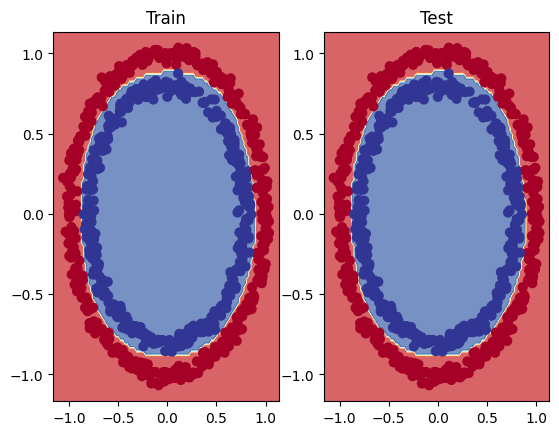

In [ ]:
# plotting the results.
plt.subplot(1,2,1)
plt.title('Train')
plot_decision_boundary(model3,x_train,y_train)

plt.subplot(1,2,2)
plt.title('Test')
plot_decision_boundary(model3,x_train,y_train)

# day 197,day 199,day 202

# multi-class classification:

In [6]:
import torch
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import requests
from pathlib import Path

In [17]:
# getting the data
x,y = make_blobs(n_samples=1000,
                 n_features=2,
                 centers=5,
                 cluster_std=0.8,
                 random_state=42)

# converting the x and y into tensors
x, y = torch.tensor(x,dtype=torch.float32), torch.tensor(y,dtype=torch.float32)

# train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

# making them device agnostic
device = 'cuda' if torch.cuda.is_available() else 'cpu'
def device_agnostic(x):
  return x.to(device)

x_train,x_test,y_train,y_test = map(device_agnostic,(x_train,x_test,y_train,y_test))



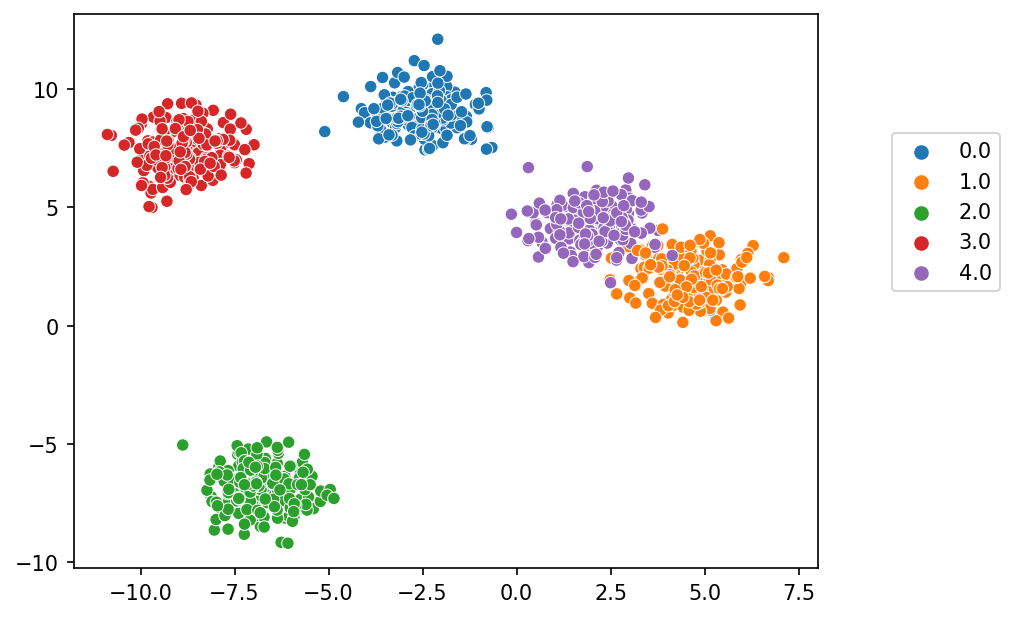

In [18]:
# visualizing
plt.figure(dpi=150)
sns.scatterplot(x=x[:,0],y=x[:,1],hue=y,palette='tab10')

plt.legend(loc=(1.1,0.5))

plt.show()


In [ ]:
x.shape

torch.Size([1000, 2])

# lessons for color selection:

# hue:
* Hue is how distinct each color is that makes us give it a name such as 'red','orange','pink' and so on based on their distinctness.

# saturation:
* talks about the colorfulness of the color, whether it is closer to white or black

# luminence:
* is about brightness of the color and it can be mistaken with saturation but you can see noticible differnce between the two with the picture attached below:

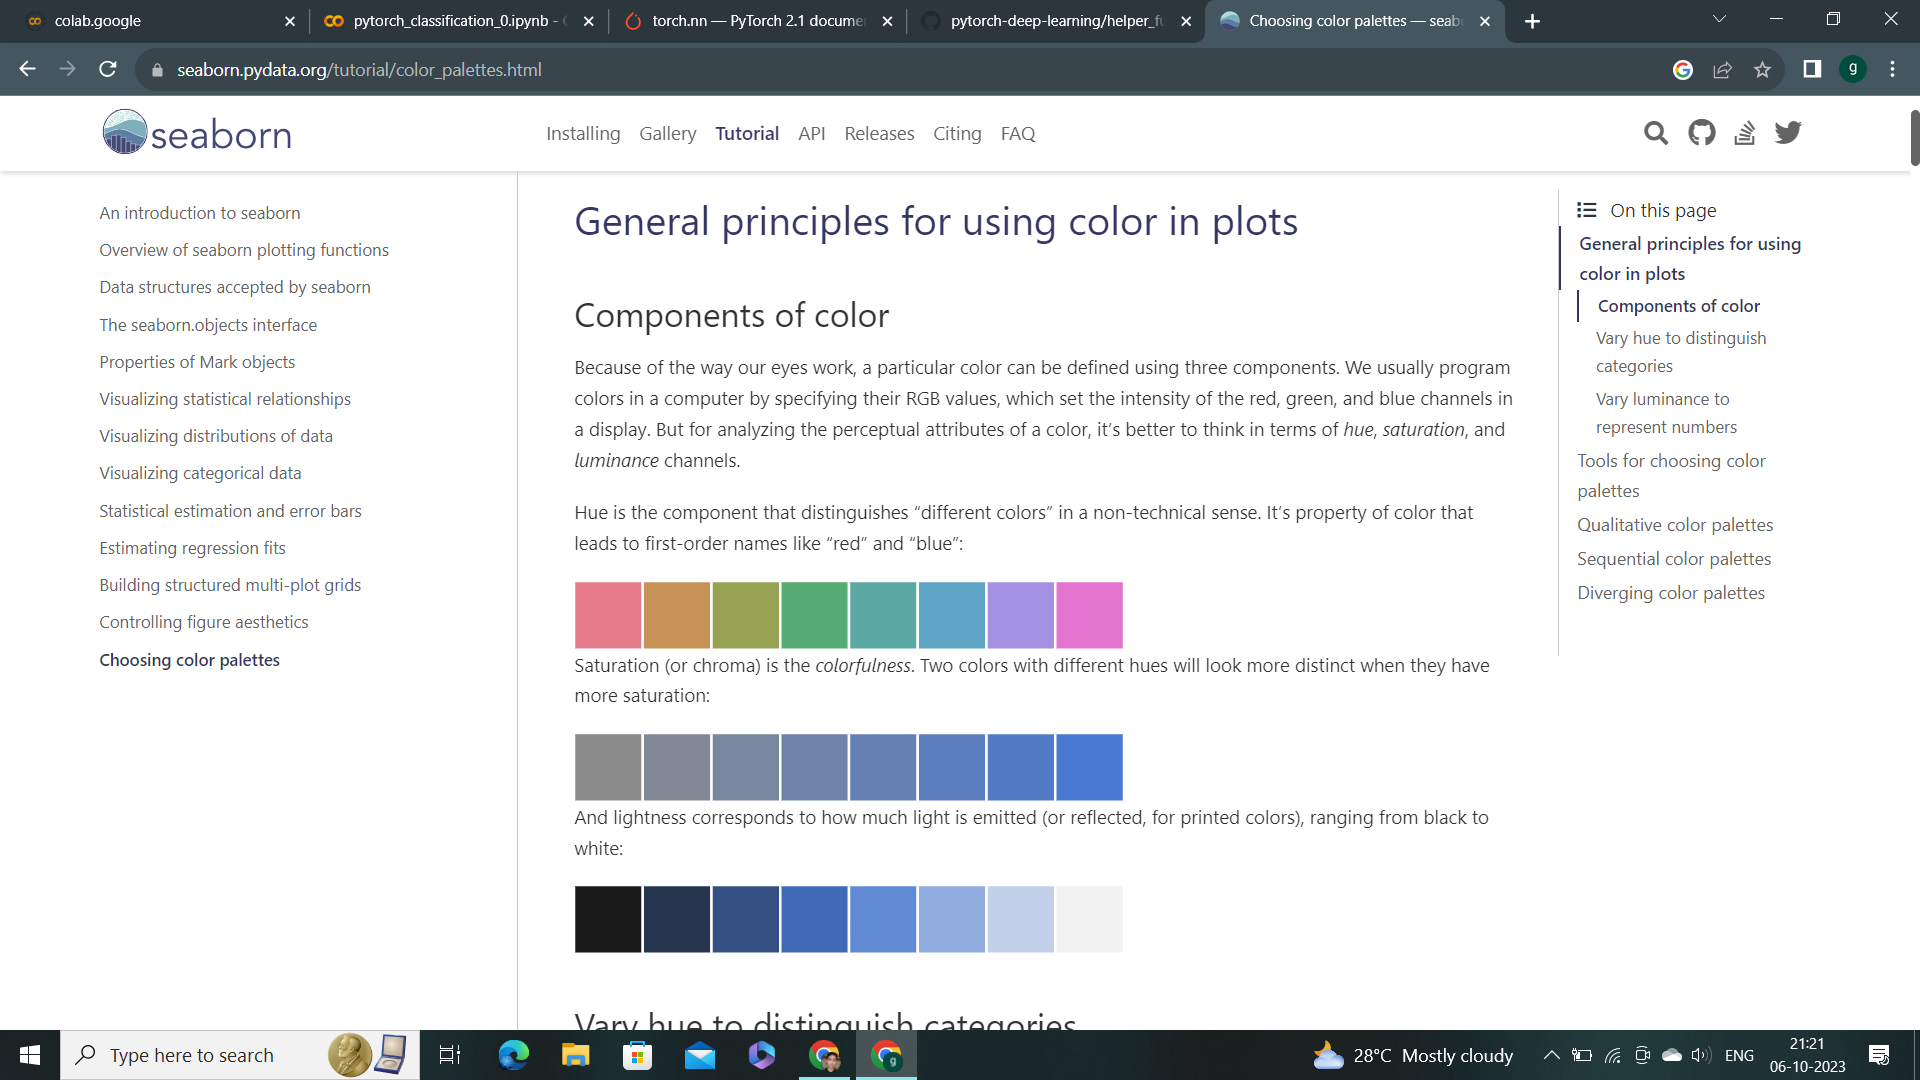

In [19]:
# building the class:
class ClassificationModelV4(torch.nn.Module):
  def __init__(self,in_features,out_features,hidden_units):
    super().__init__()
    self.neural_layers_stack = torch.nn.Sequential(
        torch.nn.Linear(in_features=in_features,out_features=hidden_units),
        torch.nn.Linear(in_features=hidden_units,out_features=hidden_units),
        torch.nn.Linear(in_features=hidden_units,out_features=hidden_units),
        torch.nn.Linear(in_features=hidden_units,out_features=hidden_units),
        torch.nn.Linear(in_features=hidden_units,out_features=out_features)
    )


  def forward(self,x):
    return (self.neural_layers_stack(x))



# creating the model:
model4 = ClassificationModelV4(in_features=2,out_features=5,hidden_units=10)

model4 = model4.to(device)

# compiling the model4:
loss = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model4.parameters(),
                            lr=0.1)


# accuracy:
def accuracy(prediction,actual):
  correct = torch.eq(prediction,actual).sum().item()
  acc = correct/len(actual)
  return acc


# fitting the model:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

epochs = 100

epoch_container = []
train_loss_container = []
train_accuracy_container = []
test_loss_container = []
test_accuracy_container = []

for epoch in range(epochs):

  # training
  model4.train()

  # getting train loss and train accuracy
  train_logits = model4(x_train)
  train_prediction = torch.argmax(torch.softmax(train_logits,dim=1),dim=1)
  train_actual = y_train
  train_loss = loss(train_logits,train_actual.long())
  train_accuracy = accuracy(train_prediction,train_actual)

  # setting the optimizer to zero grad on every iteration(let it renew itself from 0)
  optimizer.zero_grad()

  # back propogate the train_loss
  train_loss.backward()

  # step the optimizer up a notch
  optimizer.step()


  # testing
  model4.eval()

  with torch.inference_mode():
    test_logits = model4(x_test)
    test_prediction = torch.argmax(torch.softmax(test_logits,dim=1),dim=1)
    test_actual = y_test
    test_loss = loss(test_logits,test_actual.long())
    test_accuracy = accuracy(test_prediction,test_actual)

    # putting things in containers
    epoch_container.append(epoch)
    train_loss_container.append(train_loss)
    train_accuracy_container.append(train_accuracy)
    test_loss_container.append(test_loss)
    test_accuracy_container.append(test_accuracy)


    # printing things out on every 10th iteration!!
    if epoch%10 == 0:
      print('Epoch: {} | TrainLoss: {:.4f}, TrainAccuracy: {:.4f} | TestLoss: {:.4f}, TestAccuracy: {:.4f}'\
            .format(epoch,train_loss,train_accuracy,test_loss,test_accuracy))









Epoch: 0 | TrainLoss: 1.5542, TrainAccuracy: 0.3962 | TestLoss: 1.3825, TestAccuracy: 0.6250
Epoch: 10 | TrainLoss: 0.4100, TrainAccuracy: 0.9000 | TestLoss: 0.3730, TestAccuracy: 0.9400
Epoch: 20 | TrainLoss: 0.1584, TrainAccuracy: 0.9888 | TestLoss: 0.1464, TestAccuracy: 0.9950
Epoch: 30 | TrainLoss: 0.0805, TrainAccuracy: 0.9900 | TestLoss: 0.0760, TestAccuracy: 0.9900
Epoch: 40 | TrainLoss: 0.0545, TrainAccuracy: 0.9900 | TestLoss: 0.0515, TestAccuracy: 0.9900
Epoch: 50 | TrainLoss: 0.0433, TrainAccuracy: 0.9888 | TestLoss: 0.0403, TestAccuracy: 0.9900
Epoch: 60 | TrainLoss: 0.0374, TrainAccuracy: 0.9888 | TestLoss: 0.0342, TestAccuracy: 0.9900
Epoch: 70 | TrainLoss: 0.0338, TrainAccuracy: 0.9900 | TestLoss: 0.0304, TestAccuracy: 0.9900
Epoch: 80 | TrainLoss: 0.0315, TrainAccuracy: 0.9900 | TestLoss: 0.0278, TestAccuracy: 0.9900
Epoch: 90 | TrainLoss: 0.0299, TrainAccuracy: 0.9900 | TestLoss: 0.0260, TestAccuracy: 0.9900


In [10]:
if Path('helper_functions.py').is_file():
  print('Already Downloaded')
else:
  print('Downloading Helper Functions')
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py").content

  with open('helper_functions.py','wb') as f:
    f.write(request)



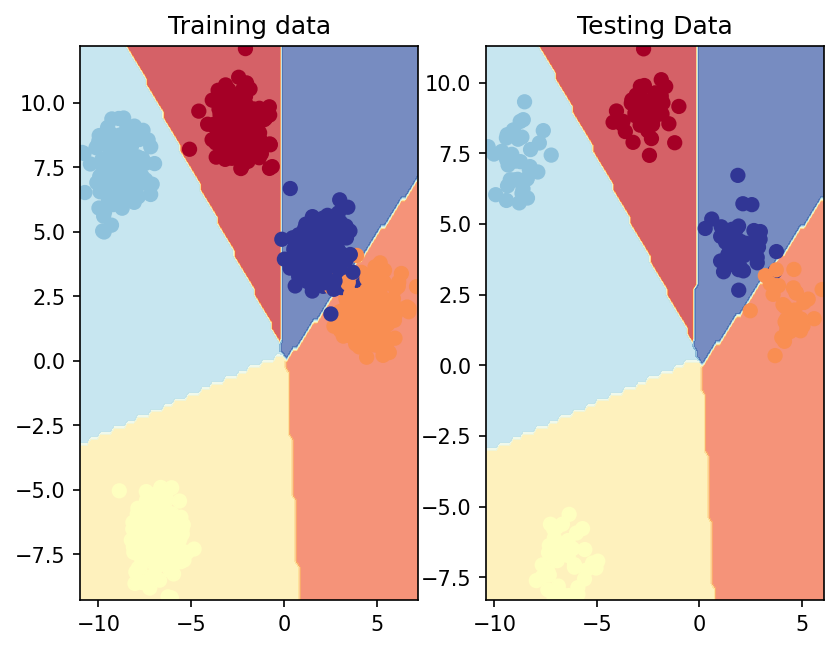

In [20]:
from helper_functions import plot_decision_boundary

plt.figure(dpi=150)
plt.subplot(1,2,1)
plt.title('Training data')
plot_decision_boundary(model4,x_train,y_train)

plt.subplot(1,2,2)
plt.title('Testing Data')
plot_decision_boundary(model4,x_test,y_test)

plt.show()

# Accuracy,Precision and Recall:

# Accuracy:

$$ \text{accuracy} = \frac{tp + tn}{tp+tn+fp+fn}  $$

* use accuracy metric when the data is equally classified such as 500 pet bottle photos and 500 cardboard photos.

* code: **torchmetrics.Accuracy()**

# Precision:

$$ \text{precision } = \frac{tp}{tp+fp} $$

* Higher precision means less false positives.

* code: **torchmetrics.Precision()**

# Recall:

$$ \text{Recall} = \frac{tp}{tp+fn} $$

* Higer Recall means less false negatives.

* code: **torchmetrics.Recall()**

# F1-score:

$$ \text{f1-score } = 2 *  \frac{\text{precision * recall}}{\text{precision + recall}} $$

* Usually good overall metric for a classification model.
* code: **torchmetrics.F1Score()**

# summary:
* it is good to have all accuracy,precision and recall all at higher numbers.
* higher precision might lead to lower recall and vice versa. that's why balanced accuracy, precision and recall would verify our model's performance as reliable.



In [42]:
import torchmetrics

accuracy = torchmetrics.Accuracy(task='multiclass',num_classes=len(torch.unique(train_actual)))


accuracy(test_prediction,test_actual)

tensor(0.9900)

In [44]:
task = 'multiclass'
num_classes = len(torch.unique(train_actual))

f1_score = torchmetrics.F1Score(task=task,num_classes=num_classes)
f1_score(train_prediction,train_actual)

tensor(0.9900)

In [62]:
from sklearn.metrics import ConfusionMatrixDisplay,confusion_matrix,classification_report



with torch.inference_mode():
  logits = model4(x_test)
  prediction = torch.argmax(torch.softmax(logits,dim=1),dim=1)
  actual = y_test
  cm = confusion_matrix(actual,prediction)


print(classification_report(actual,prediction))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        41
         1.0       0.97      0.97      0.97        34
         2.0       1.00      1.00      1.00        47
         3.0       1.00      1.00      1.00        36
         4.0       0.98      0.98      0.98        42

    accuracy                           0.99       200
   macro avg       0.99      0.99      0.99       200
weighted avg       0.99      0.99      0.99       200



# exploration,analysis and freethrows

In [40]:
len(torch.unique(y_train))

5

In [ ]:
x_min,x_max = x[:,0].min()-0.1 , x[:,0].max() + 0.1
y_min,y_max = x[:,1].min()-0.1 , x[:,1].max() + 0.1

# meshgrid creates the matrix
xx,yy = np.meshgrid(np.linspace(x_min,x_max,101),np.linspace(y_min,y_max,101))

xx

array([[-12.76920986, -12.54793576, -12.32666166, ...,   8.91565187,
          9.13692597,   9.35820007],
       [-12.76920986, -12.54793576, -12.32666166, ...,   8.91565187,
          9.13692597,   9.35820007],
       [-12.76920986, -12.54793576, -12.32666166, ...,   8.91565187,
          9.13692597,   9.35820007],
       ...,
       [-12.76920986, -12.54793576, -12.32666166, ...,   8.91565187,
          9.13692597,   9.35820007],
       [-12.76920986, -12.54793576, -12.32666166, ...,   8.91565187,
          9.13692597,   9.35820007],
       [-12.76920986, -12.54793576, -12.32666166, ...,   8.91565187,
          9.13692597,   9.35820007]])

In [ ]:
yy

array([[-11.32449341, -11.32449341, -11.32449341, ..., -11.32449341,
        -11.32449341, -11.32449341],
       [-11.06231463, -11.06231463, -11.06231463, ..., -11.06231463,
        -11.06231463, -11.06231463],
       [-10.80013586, -10.80013586, -10.80013586, ..., -10.80013586,
        -10.80013586, -10.80013586],
       ...,
       [ 14.36902643,  14.36902643,  14.36902643, ...,  14.36902643,
         14.36902643,  14.36902643],
       [ 14.63120521,  14.63120521,  14.63120521, ...,  14.63120521,
         14.63120521,  14.63120521],
       [ 14.89338398,  14.89338398,  14.89338398, ...,  14.89338398,
         14.89338398,  14.89338398]])

In [ ]:
type(xx)

numpy.ndarray

In [ ]:
xx.shape

(101, 101)

In [ ]:
# it flattens the matrix
xx.ravel()

array([-12.76920986, -12.54793576, -12.32666166, ...,   8.91565187,
         9.13692597,   9.35820007])

In [ ]:
xx.ravel().shape

(10201,)

In [ ]:
101*101

10201

In [ ]:
np.column_stack

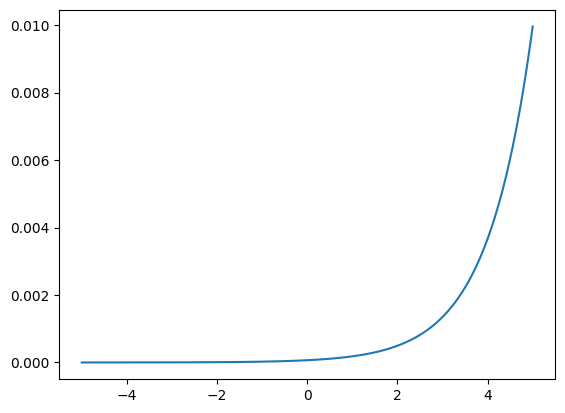

In [ ]:
# visualizing the softmax model:

x = np.linspace(-5,5,1000)

softmax_func = np.exp(x)/sum(np.exp(x))

plt.plot(x,softmax_func)

plt.show()

In [24]:
from torchmetrics import Accuracy